# Deliverable 1 - Binary Classifier

## Import

In [1]:
# Disable Tensorflow's warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pathlib
from typing import Any,Union   

2022-10-07 01:19:25.916639: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Global Variables

In [3]:
BATCH_SIZE:int  = 64
IMG_HEIGHT:int  = 227
IMG_WIDTH:int   = 227
EPOCHS = 15

## Load Thoma's Dataset

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory('data_bin_thomas/train',
                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                            batch_size=BATCH_SIZE)

val_data = tf.keras.utils.image_dataset_from_directory('data_bin_thomas/val',
                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                            batch_size=BATCH_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory('data_bin_thomas/test',
                                            image_size=(IMG_HEIGHT, IMG_WIDTH),
                                            batch_size=BATCH_SIZE)

class_names = train_data.class_names

Found 32439 files belonging to 2 classes.
Found 4057 files belonging to 2 classes.
Found 4064 files belonging to 2 classes.


In [5]:
# Load datasets in cache to optimize 
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

## Model

In [6]:
with tf.device('/GPU:0'):
    # Def model
    model = tf.keras.Sequential([
        # Rescaling (0 and 1)
        tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

        # Feature extraction
        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        tf.keras.layers.Conv2D(256, 3, 2, activation='relu'),
        tf.keras.layers.MaxPooling2D(strides=2),

        # Deep NN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile model
    model.compile(optimizer='adamax',
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

## Train

In [7]:
with tf.device('/GPU:0'):
    history:tf.keras.callbacks.History = model.fit(
        train_data,
        validation_data=val_data,
        epochs=EPOCHS
    )

Epoch 1/15
 72/507 [===>..........................] - ETA: 57s - loss: 0.5086 - accuracy: 0.7537

Corrupt JPEG data: 419 extraneous bytes before marker 0xd9


507/507 [==============================] - 122s 235ms/step - loss: 0.3807 - accuracy: 0.7945 - val_loss: 0.3034 - val_accuracy: 0.8501
Epoch 2/15
507/507 [==============================] - 70s 137ms/step - loss: 0.2935 - accuracy: 0.8616 - val_loss: 0.2553 - val_accuracy: 0.8824
Epoch 3/15
507/507 [==============================] - 73s 143ms/step - loss: 0.2509 - accuracy: 0.8902 - val_loss: 0.2358 - val_accuracy: 0.8950
Epoch 4/15
507/507 [==============================] - 73s 143ms/step - loss: 0.2171 - accuracy: 0.9080 - val_loss: 0.2329 - val_accuracy: 0.8950
Epoch 5/15
507/507 [==============================] - 73s 144ms/step - loss: 0.1879 - accuracy: 0.9234 - val_loss: 0.2255 - val_accuracy: 0.9007
Epoch 6/15
507/507 [==============================] - 73s 143ms/step - loss: 0.1657 - accuracy: 0.9331 - val_loss: 0.2005 - val_accuracy: 0.9137
Epoch 7/15
507/507 [==============================] - 73s 144ms/step - loss: 0.1398 - accuracy: 0.9448 - val_loss: 0.1971 - val_accuracy: 0.

## Graphs of the evolution of accuracy and loss 

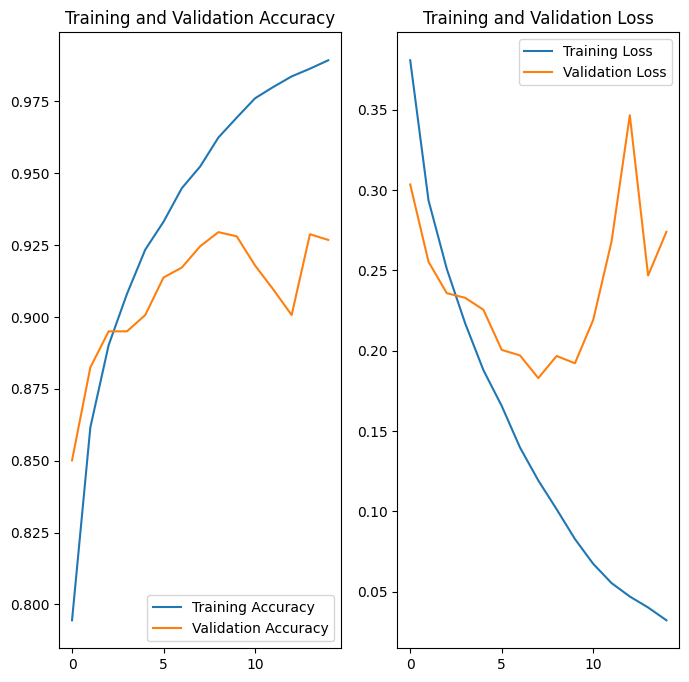

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluate

In [11]:
print("Evaluate on test data")
results = model.evaluate(test_data, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
64/64 [==============================] - 22s 289ms/step - loss: 0.2505 - accuracy: 0.9326
test loss, test acc: [0.2505286931991577, 0.9325787425041199]


## Save

In [10]:
import datetime
import pandas as pd

date:datetime = datetime.datetime.now().strftime("%m.%d.%Y_%H:%M:%S")
model_dir:str = f"models/bin_{date}"
model.save(model_dir)
f = open(f"{model_dir}/model_summary.txt", "a")
model.summary(print_fn=lambda x: f.write(x + '\n'))
f.close()

f = open(f"{model_dir}/model_history.csv", "a")
f.write(pd.DataFrame.from_dict(history.history).to_csv(index=False))
f.close()

INFO:tensorflow:Assets written to: models/bin_10.07.2022_01:38:54/assets


INFO:tensorflow:Assets written to: models/bin_10.07.2022_01:38:54/assets
